# Integrals 

In this section we will close out by discussing **integrals**, which calculates areas under a function. Also called the **antiderivative**, the process is done through **integration**. We will once again use SymPy to assist us in calculating integrals and avoid pencil-and-paper work you might have done in high school and college.

## Discovering Integration

Let say we have this function. 

$ 
\Large f(x) = 2x - 2
$

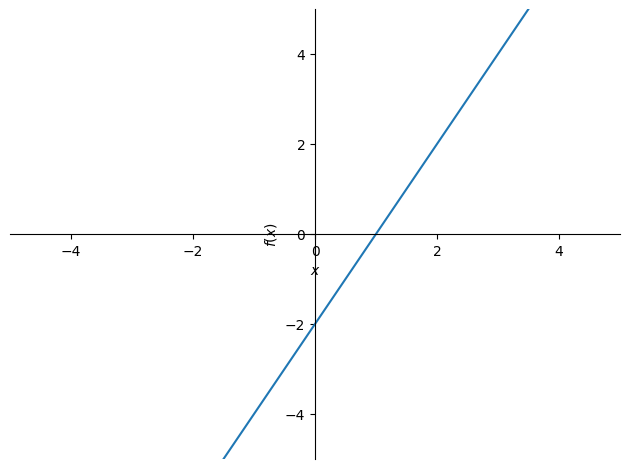

In [7]:
from sympy import * 

x = symbols('x')
f = 2*x - 2

plot(f,xlim=(-5,5), ylim=(-5,5)) 

Now let's say you wanted to find the area under the function between $ x = 1 $ and $ x = 3 $, but above the x-axis. Let's shade it by passing the `fill` parameter below to `plot()`. 

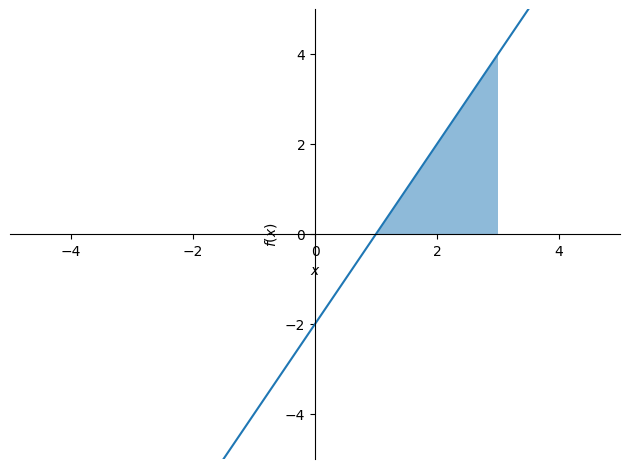

In [11]:
from sympy import * 
import numpy as np 

x = symbols('x')
f = 2*x - 2

x_array = np.linspace(1, 3, 1000)
f_array = lambdify(x, f)(x_array)

plot(f, xlim=(-5,5), ylim=(-5,5), fill={'x': x_array,'y1':f_array, 'alpha': .5}) 

Calculating this area is not a terribly big deal. We can see clearly this is a triangle and we can use that basic geometry formula: 

$ 
\Large A = \frac{1}{2} bh
$ 

So if the base is $ 2 $ and the height is $ 4 $, we find the area is $ 4 $. 


$ 
\Large A = \frac{1}{2} (2)(4) = 8 
$ 

We can also use the `integrate()` function in SymPy to calculate the area for this range. We will explore this function more in a moment. 

In [12]:
from sympy import * 

x = symbols('x')
f = 2*x - 2

integrate(f, (x,1,3))

4

Now what about a curvilinear function that is not a straight line. What is the area between $ 0 $ and $ 1 $? 

$
\Large f(x) = 2 x^{2} + 1
$

2 x^{2} + 1


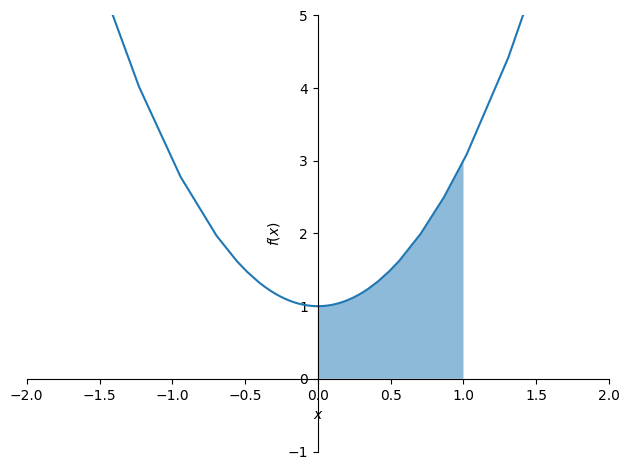

In [22]:
from sympy import * 
import numpy as np 

x = symbols('x')
f = 2*x**2 + 1

x_array = np.linspace(0, 1, 1000)
f_array = lambdify(x, f)(x_array)

plot(f, xlim=(-2,2), ylim=(-1,5), fill={'x': x_array,'y1':f_array, 'alpha': .5}) 

Uh-oh. This is not as straightforward as we no longer have straight edges to calculate against. Now coincidentally, we can use the SymPy to calculate this using the `integrate()` function once again. We get an area of $ 5/3 $. 

In [23]:
from sympy import * 

x = symbols('x')
f = 2*x**2 + 1

integrate(f, (x,0,1))

5/3

But how does this even work? How can we find the area under a given function like this? Well, it all comes down to once again... a limit! 

## Reimann Sums

Here is how we can reason about finding the area under any given function. Let's say we packed some rectangles of equal width under the function for the given range we are interested in. We will create a `plot_reimann_sums()` function that does just this, and let's start with 5 rectangles. 

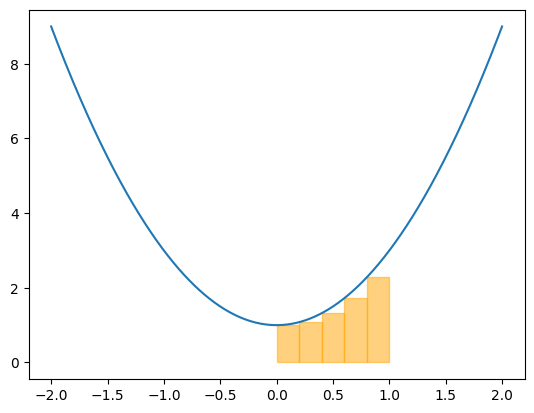

In [54]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np 

def plot_reimann_sums(f, x_axis_lower, x_axis_upper, x_lower, x_upper, n_rects): 
    
    # Define the interval for the x-axis
    x_vals = np.linspace(x_axis_lower, x_axis_upper, 1000)
    
    # Calculate the function values for the x-axis values
    y_vals = f(x_vals)
    
    # Create the plot
    fig, ax = plt.subplots()

    # Define the rectangles
    x_rects = np.linspace(x_lower, x_upper, n_rects+1)
    y_rects = f(x_rects)

    # plot rectangles 
    for x,y,next_x in zip(x_rects, y_rects, x_rects[1:]): 
        ax.add_patch(Rectangle((x, 0), next_x-x, y, alpha=.5, color='orange'))

    plt.plot(x_vals, y_vals)
    
    # Show the plot
    plt.show()

def f(x): return 2*x**2 + 1
    
plot_reimann_sums(f, x_axis_lower=-2, x_axis_upper=2, x_lower=0, x_upper=1, n_rects=5)

Rectangles are easy to take the area of, right? So we can approximate the area by totaling the area under the rectangles. But what if we used more rectangles with smaller widths? What do 10 rectangles look like? 

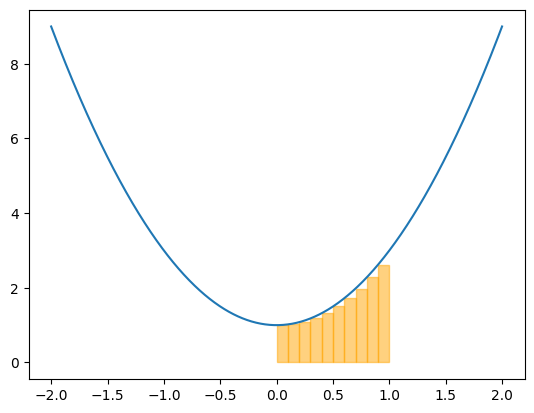

In [39]:
plot_reimann_sums(f, x_axis_lower=-2, x_axis_upper=2, x_lower=0, x_upper=1, n_rects=10)

What about 20 rectangles? 

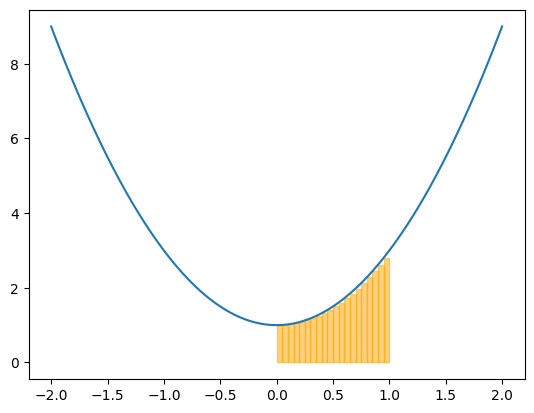

In [40]:
plot_reimann_sums(f, x_axis_lower=-2, x_axis_upper=2, x_lower=0, x_upper=1, n_rects=20)

Is it fair to say that the more rectangles we have, and total their areas, the closer we get to the actual area for that range under the curve? This approach is what we call **Reimann Sums**. Wait a minute, this is a limit! As we approach the number of rectangles to infinity, would that not converge to the actual area under the curve? 

Let's run an approximation using 10,000 rectangles, no chart. Let's put it into this function that roughly approximates using this Reimann Sums approach. 

In [55]:
def approximate_integral(a, b, n, f):
    delta_x = (b - a) / n
    total_sum = 0

    for i in range(1, n + 1):
        leftpoint = a + delta_x * (i - 1)
        total_sum += f(leftpoint)

    return total_sum * delta_x

area = approximate_integral(a=0, b=1, n=10_000, f=f)

print(area) # 1.6665666699999973

1.6665666699999973


Let's get more precise here. Let's use SymPy and approach an infinite number of rectangles and sum them. Sure enough, we get $ 5 / 3 $. 

In [60]:
from sympy import *

# Declare variables to SymPy
x, i, n = symbols('x i n')

# Declare function and range
f = 2*x**2 + 1
lower, upper = 0, 1

# Calculate width and each rectangle height at index "i"
delta_x = ((upper - lower) / n)
x_i = (lower + delta_x * i)
fx_i = f.subs(x, x_i)

# Iterate all "n" rectangles and sum their areas
n_rectangles = Sum(delta_x * fx_i, (i, 1, n)).doit()

# Calculate the area by approaching the number
# of rectangles "n" to infinity
area = limit(n_rectangles, n, oo)

print(area) # prints 5/3

5/3


Thankfully, like derivatives we do not have to do all this limit work. Instead we can use the `integrate()` function as we showed earlier. It will take all the limit work behind the scenes. 

In [61]:
from sympy import * 

x = symbols('x')
f = 2*x**2 + 1

integrate(f, (x,0,1))

5/3

Note when we provide a range as we have shown in the previous example, we call it a **definite integral**. We denote it like this: 

$
\Large \int_{0}^{1} (2x^2 + 1) = \frac{5}{3}
$


If we wanted to generalize the integral function without any specific range, we call it an **indefinite integral**. 

$
\Large \int (2x^2 + 1) = \frac{2 x^{3}}{3} + x
$

We can calculate an indefinite integral like this in SymPy. 

In [66]:
from sympy import * 

x = symbols('x')
f = 2*x**2 + 1

integrate(f,x)

\frac{2 x^{3}}{3} + x


Keep in mind that the indefinite integral captures the area from negative infinity up to the given $ x $ value. So if we wanted to calculate the area from $ x = 0 $ to $ x = 1 $, then substitute both values into the indefinite integral, and subtract the latter from the former. 

$ 
\Large \int_{0}^{1} (2x^2 + 1) = (\frac{2 (1)^{3}}{3} + 1) - (\frac{2 (0)^{3}}{3} + 0) = \frac{5}{3}
$ 

## Normal Distribution Example 